# **Dimensionality Reduction**

En `video-features.ipynb` se pudo extraer las caracteristicas de los videos del dataset `test_subset_10.csv`, `train_subset_10.csv` y `val_subset_10.csv`, de manera que, cada vector característico se almacenó en un archivo `${youtube_id}.npy`(dentro de la carpeta 'extraction')

## **Load packages**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import os
from imblearn.over_sampling import SMOTE

## **Load datasets**

In [3]:
train_path = "./data/train_subset_10.csv"
val_path = "./data/val_subset_10.csv"
test_path = "./data/test_subset_10.csv"

train_df = pd.read_csv(train_path)
val_df = pd.read_csv(val_path)
test_df = pd.read_csv(test_path)

## **Useful functions**

In [4]:
def get_X_y_id(path: str, df:pd.DataFrame, is_train:bool=True, type:str="mean"):

    """
    Description:
        This function returns the feature_vectors, labels an ids of the videos

    Args: 
        path (str): the path to the directory where the videos are located
        df (pd.DataFrame): a DataFrame of Pandas, could be train_df, val_df or test_df
        is_train (bool): if True, the function returns the feature_vectors, labels an ids of the videos
        type (str): the type of feature to extract from the videos, could be "mean" or "max"

    """

    feature_vectors = []
    labels = []
    ids = []

    for video in Path(path).glob('*.npy'):
        
        id = os.path.basename(video).split('_')[0]

        if id not in df['youtube_id'].values:
            continue

        current_video = np.load(video)

        if len(current_video.shape) <= 1:
            continue
        
        if type == "mean":
            feature_vectors.append(np.mean(current_video, axis = 0))
        elif type == "max":
            feature_vectors.append(np.max(current_video, axis = 0))
        ids.append(id)

        if is_train:
            labels.append(df[df['youtube_id'] == id]['label'].values[0])

    feature_vectors = pd.DataFrame(np.vstack(feature_vectors))
    ids = pd.DataFrame({'youtube_id': ids})
    
    if is_train:
        labels = pd.DataFrame(np.vstack(labels))
        return feature_vectors, labels, ids
    else:
        return feature_vectors, ids


In [5]:
path_train = './extraction/train/r21d/r2plus1d_18_16_kinetics'
path_val = './extraction/val/r21d/r2plus1d_18_16_kinetics'
path_test = './extraction/test/r21d/r2plus1d_18_16_kinetics'

In [17]:
X_train, y_train, ids_train = get_X_y_id(path_train, train_df, type='max')
X_val, y_val, ids_val = get_X_y_id(path_val, val_df, type='max')
X_test, ids_test = get_X_y_id(path_test, test_df, False, type='max')

In [18]:
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,1.715761,0.648911,1.384313,1.488520,2.702970,0.578486,2.172361,1.542659,1.079280,1.080142,...,1.736405,1.614319,1.433291,1.075427,1.544145,1.235392,1.383703,1.184453,2.125181,2.745854
1,2.164764,1.417119,0.971108,0.929732,2.530224,0.853871,2.103758,0.706431,1.826231,1.102707,...,1.093361,1.906169,1.399460,1.876642,3.528308,2.267634,3.596667,0.742848,2.001526,2.464671
2,3.023403,1.491444,2.213186,1.725737,1.074747,0.446066,1.355107,0.864334,0.899243,0.820174,...,1.510332,2.418455,3.111727,0.789760,0.879665,3.026855,1.643871,0.317533,0.885161,0.541010
3,0.392601,0.456201,0.511008,0.949749,0.898963,0.795990,1.442435,0.883178,1.709076,1.711742,...,1.237434,0.081710,1.995621,1.822746,0.892734,1.269814,0.079019,0.682017,1.378560,0.342264
4,0.314655,0.892775,1.364763,0.895481,0.755563,0.374005,0.932063,1.644701,0.796109,1.161549,...,0.953388,0.240254,0.920965,1.631108,0.819086,1.158348,0.779067,0.548195,1.874264,1.039919


In [19]:
y_val.head()

,0
0,flipping pancake
1,wrapping present
2,stretching leg
3,stretching leg
4,shot put


In [20]:
ids_val.head()


,youtube_id
0,--33Lscn6sk
1,-0WZKTu0xNk
2,-2VKVjgNuE0
3,-2VXhGGeOWg
4,-2zDnjMmI5U


De esta manera, la fila 0 de X, y, id se corresponden, lo mismo para la fila 1, 2, ...

In [21]:
print(f"Shape de la matriz de training: {X_train.shape}")
print(f"Size de los labels de training: {y_train.shape}")
print(f"Size de los ids de training: {ids_train.shape}\n")

print(f"Shape de la matriz de validation: {X_val.shape}")
print(f"Size de los labels de validation: {y_val.shape}")
print(f"Size de los ids de validation: {ids_val.shape}\n")

print(f"Shape de la matriz de testing: {X_test.shape}")
print(f"Size de los ids de testing: {ids_test.shape}")


Shape de la matriz de training: (5414, 512)
Size de los labels de training: (5414, 1)
Size de los ids de training: (5414, 1)

Shape de la matriz de validation: (426, 512)
Size de los labels de validation: (426, 1)
Size de los ids de validation: (426, 1)

Shape de la matriz de testing: (805, 512)
Size de los ids de testing: (805, 1)


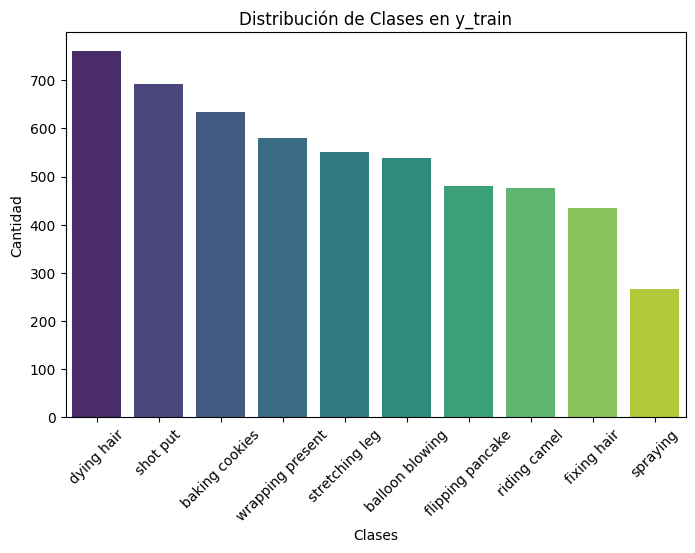

In [22]:
class_counts = y_train.iloc[:, 0].value_counts() 

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.title("Distribución de Clases en y_train")
plt.xticks(rotation=45)
plt.show()

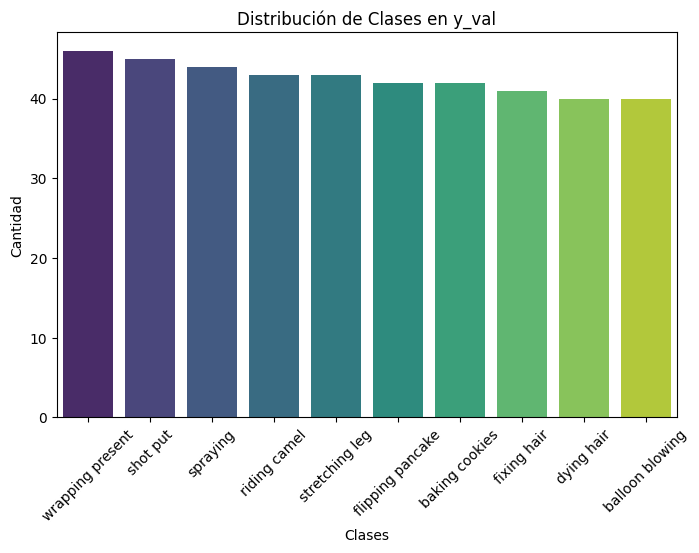

In [23]:
class_counts = y_val.iloc[:, 0].value_counts() 

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.title("Distribución de Clases en y_val")
plt.xticks(rotation=45)
plt.show()

Como se observó cierto desbalance en las clases de X_train, y_train. se decidió aplicar `oversampling`

Distribución de clases después de SMOTE:


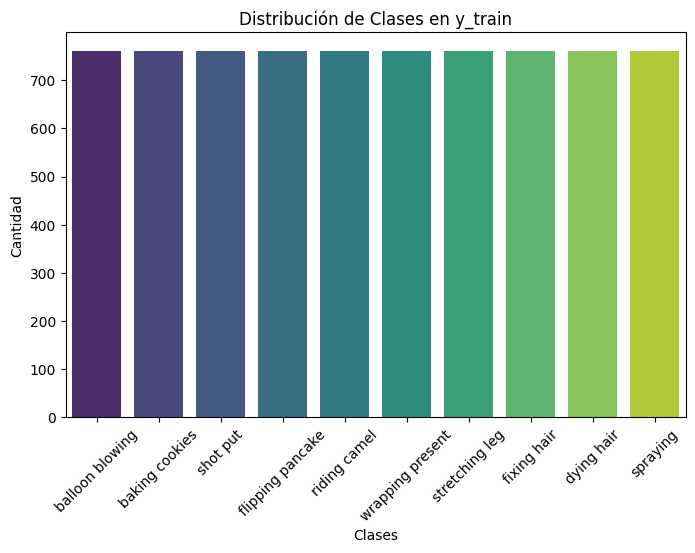

In [24]:
# oversampling

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("Distribución de clases después de SMOTE:")

class_counts = y_train.iloc[:, 0].value_counts() 

plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, hue=class_counts.index, palette="viridis", legend=False)
plt.xlabel("Clases")
plt.ylabel("Cantidad")
plt.title("Distribución de Clases en y_train")
plt.xticks(rotation=45)
plt.show()

## **Utils: Save and load processed (averaged) features**

Guardar los features promediados en archivos npz, para poder cargarlos cada vez que se necesiten.

In [25]:
def save_df_as_npz(directory:str, filename:str, features:pd.DataFrame, ids, labels=None):
    """
    Description:
        This function saves the feature vectors, ids and labels as npz files.
        Ej: en test.npz estará una matriz con los features y un array con sus
        respectivas labels.

    Args: 
        features (pd.DataFrame): the feature vectors
        labels (pd.DataFrame): the labels
        directory (str): the directory where the npz files will be saved
        filename (str): the name of the npz file

    """
    features = features.to_numpy()
    ids = ids.to_numpy()
    if labels is not None:
        labels= labels.to_numpy()
        np.savez(os.path.join(directory, filename), features=features, ids=ids, labels=labels)
    else:
        np.savez(os.path.join(directory, filename), features=features, ids=ids)

def load_features_ids_labels(filename:str, has_labels=True):
    """
    Description:
        Cargar los features, ids y labels de un archivo npz.
        Si es data de testeo, has_labels=False
    """
    contents = np.load(filename, allow_pickle=True)
    features = contents['features']
    ids = contents['ids']
    if has_labels:
        labels = contents['labels']
        return features, ids, labels
    return features, ids

In [26]:
# Guardar (crear carpeta 'features_np' si no existe)
# Validation
save_df_as_npz(features=X_val, ids=ids_val, labels=y_val, directory='features_np', filename='features_val.npz')
# Test
save_df_as_npz(directory='features_np', filename='features_test.npz', features=X_test, ids=ids_test)
# Train
save_df_as_npz(directory='features_np', filename='features_train.npz', features=X_train, ids=ids_train, labels=y_train)


In [32]:
# Ejemplo para cargar los features guardados
X_train_np, ids_train_np, y_train_np = load_features_ids_labels(filename='features_np/features_train.npz', has_labels=True)
X_val_np, ids_val_np, y_val_np = load_features_ids_labels(filename='features_np/features_val.npz', has_labels=True)
X_test_np, ids_test_np = load_features_ids_labels(filename='features_np/features_test.npz', has_labels=False)

## **Reduce dimensionality**

Con los features ya procesados, probar técnicas de reducción de dimensionalidad

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer


In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

scaler = StandardScaler()
# scaler = PowerTransformer(method='yeo-johnson')
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val_np)
X_test_scaled = scaler.transform(X_test_np)

In [34]:
print(y_train_np)

[['balloon blowing']
 ['balloon blowing']
 ['baking cookies']
 ...
 ['wrapping present']
 ['wrapping present']
 ['wrapping present']]


In [ ]:
# encoder = LabelEncoder()
# y_train_np = encoder.fit_transform(y_train_np) 
# print(y_train_np)

[1 1 0 ... 9 9 9]


c:\Users\nayel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **t-SNE**

In [58]:

train_numeric_labels, class_names = pd.factorize(y_train_np.ravel())  

In [42]:
print(train_numeric_labels)

[0 0 1 ... 5 5 5]


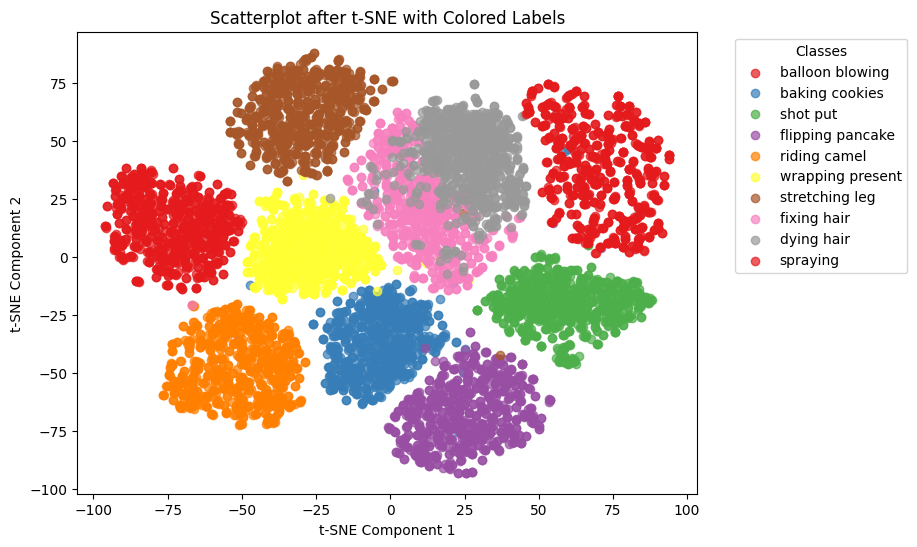

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, learning_rate='auto', init='random', random_state=0, perplexity=10)
train_tsne = tsne.fit_transform(X_train_scaled)
unique_labels = np.unique(train_numeric_labels)
palette = sns.color_palette("Set1", len(unique_labels))  # Asignar colores a cada etiqueta

plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    mask = train_numeric_labels == label
    plt.scatter(train_tsne[mask, 0], train_tsne[mask, 1], 
                color=palette[i], label=class_names[label], alpha=0.7)

plt.legend(title="Classes", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatterplot after t-SNE with Colored Labels')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.show()



### **PCA**

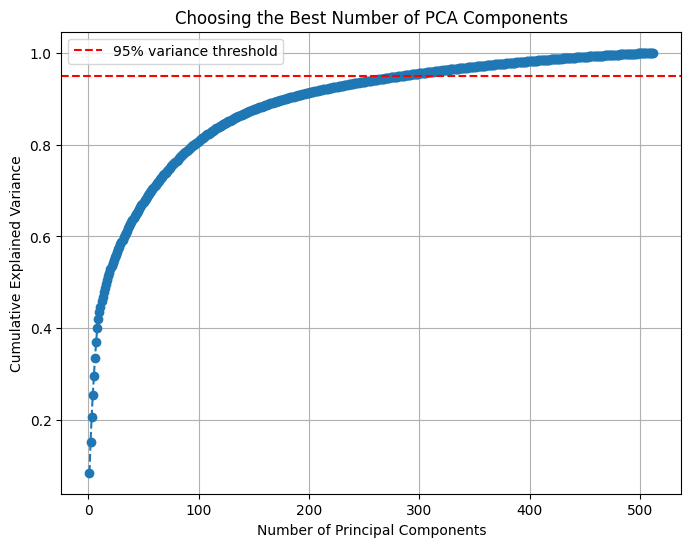

In [69]:
pca = PCA()
pca.fit(X_train_scaled)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')  # threshold line
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Choosing the Best Number of PCA Components')
plt.legend()
plt.grid()
plt.show()


In [70]:
optimal_components = np.argmax(cumulative_variance >= 0.95) + 1
print("Optimal number of components:", optimal_components)


Optimal number of components: 286


Shape after PCA w/ 2 components: (7610, 286)


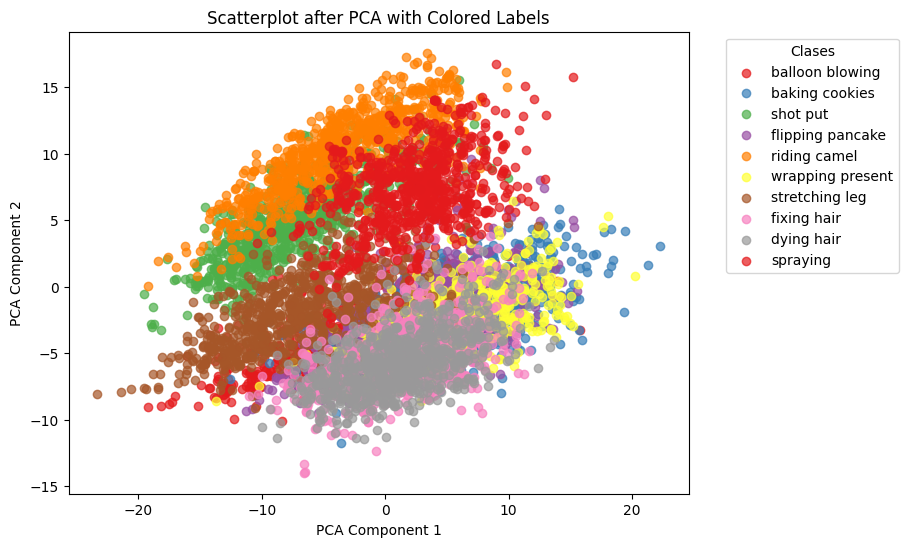

In [71]:
pca_ = PCA(n_components=optimal_components)
train_pca = pca_.fit_transform(X_train_scaled)
print("Shape after PCA w/ 2 components:", train_pca.shape)

unique_labels = np.unique(train_numeric_labels)
palette = sns.color_palette("Set1", len(unique_labels))  

plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    mask = train_numeric_labels == label
    plt.scatter(train_pca[mask, 0], train_pca[mask, 1], 
                color=palette[i], label=class_names[label], alpha=0.7)

plt.legend(title="Clases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatterplot after PCA with Colored Labels')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()



### **LDA**

shape of LDA: (7610, 2)


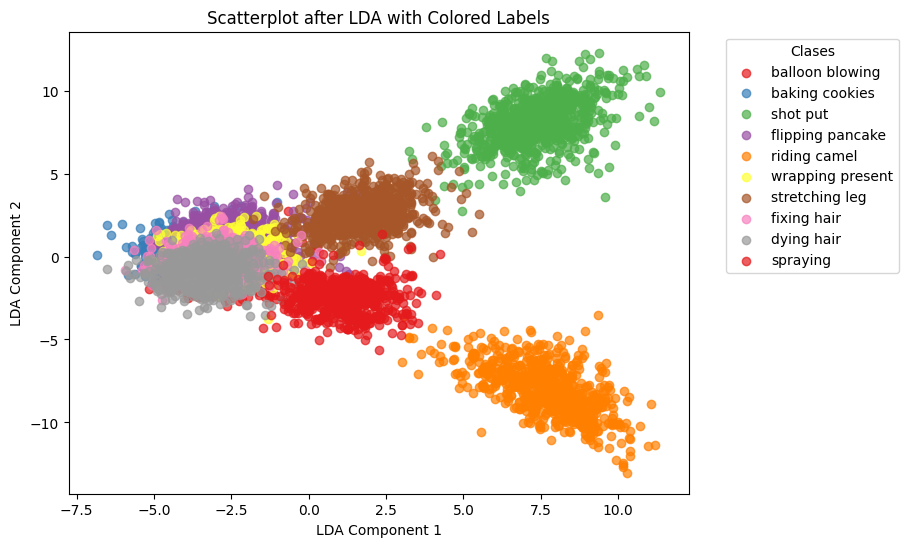

In [73]:
lda = LinearDiscriminantAnalysis(n_components=2)
train_lda = lda.fit_transform(X_train_scaled, y_train_np.flatten())
print('shape of LDA:', train_lda.shape)

unique_labels = np.unique(train_numeric_labels)
palette = sns.color_palette("Set1", len(unique_labels))

plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    mask = train_numeric_labels == label
    plt.scatter(train_lda[mask, 0], train_lda[mask, 1], 
                color=palette[i], label=class_names[label], alpha=0.7)

plt.legend(title="Clases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatterplot after LDA with Colored Labels')
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.show()

In [55]:
pip install umap-learn

Note: you may need to restart the kernel to use updated packages.Collecting umap-learn




[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\nayel\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


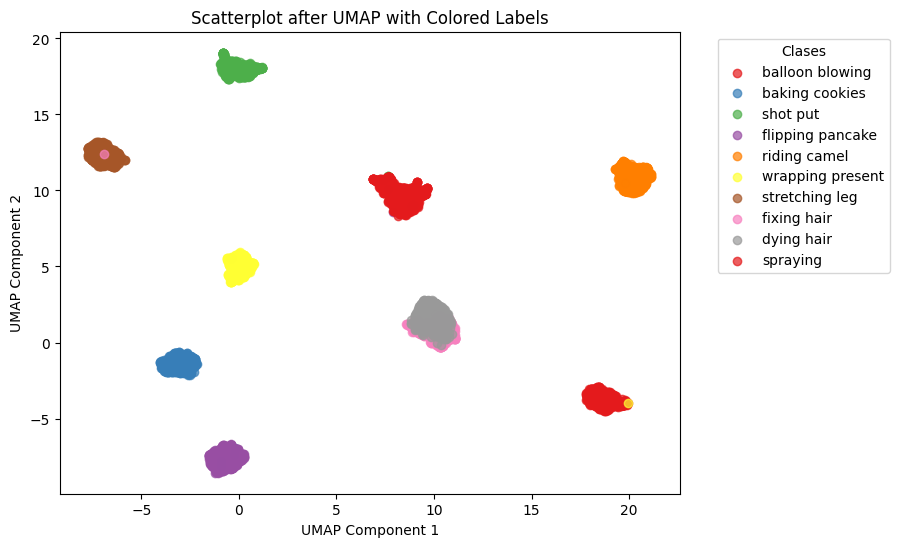

In [74]:
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
train_umap = umap_reducer.fit_transform(X_train_scaled)

unique_labels = np.unique(train_numeric_labels)
palette = sns.color_palette("Set1", len(unique_labels))  

plt.figure(figsize=(8, 6))
for i, label in enumerate(unique_labels):
    mask = train_numeric_labels == label
    plt.scatter(train_umap[mask, 0], train_umap[mask, 1], 
                color=palette[i], label=class_names[label], alpha=0.7)

plt.legend(title="Clases", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatterplot after UMAP with Colored Labels')
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()